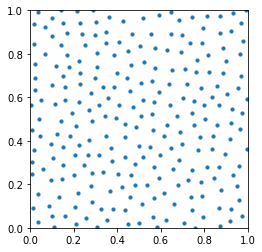

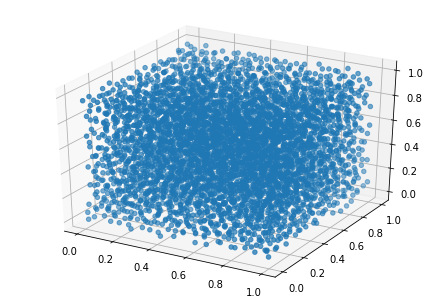

In [1]:
# Poisson disc sampling in arbitrary dimensions
# Implementation by Pavel Zun, pavel.zun@gmail.com
# BSD licence - https://github.com/diregoblin/poisson_disc_sampling

# -----------------------------------------------------------------------------
# Based on 2D sampling by Nicolas P. Rougier - https://github.com/rougier/numpy-book
# -----------------------------------------------------------------------------
import numpy as np
import poisson_disc as pd
# plotting tools
# %matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

if __name__ == '__main__':

    # default: 2D points
    points = pd.Bridson_sampling()
    fig = plt.figure()
    ax = plt.axes()
    ax.scatter(points[:,0], points[:,1], s=10)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    
    # 3D points
    dims3d = np.array([1.0,1.0,1.0])
    points3d = pd.Bridson_sampling(dims3d, radius=0.05, k=30)
    fig3d = plt.figure()
    ax3d = Axes3D(fig3d)
    ax3d.scatter(points3d[:,0], points3d[:,1], points3d[:,2])
    plt.show()   

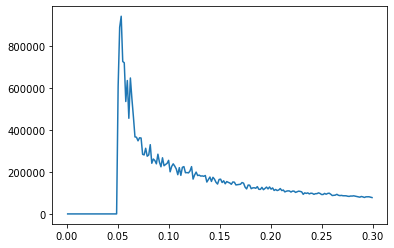

In [2]:
#Radial distribution function
import math

def print_rdf(points, dims, rmax = 0.3, Nbins = 200):
    ndim = points.shape[1]
    distances = []
    for point1 in points:
        # only look in the center to avoin edge effects
        if np.all(np.zeros(ndim) <= point1 - rmax) and np.all(point1 + rmax < dims):
            for point2 in points:
                if np.any(point1 != point2):
                    distances.append(math.sqrt(pd.squared_distance(point1, point2)))

    binwidth = rmax / Nbins
    # declare a list of r values
    rs = np.linspace(binwidth/2, rmax - binwidth/2, Nbins)

    # weight the bins by 1 / r^ndim (3 in the 3D case) (missing some constants to make it a real spherical shell volume)
    f2 = lambda i: 1/i**ndim
    weights_array = f2(rs)
    hist, bin_edges = np.histogram(distances, Nbins, range=(0,rmax))
    
    figDist = plt.figure()
    ax = plt.axes()
    ax.plot(rs, hist * weights_array)
    
    plt.show()    
    

# No two points are closer than "radius" to each other        
print_rdf(points3d, dims3d)

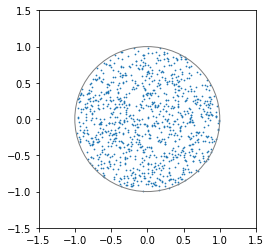

In [3]:
# Hypersphere sampling test

fig1 = plt.figure()
ax1 = fig1.gca()
center = np.array([0,0])
radius = 1
p = pd.hypersphere_sample(center,radius,1000)
ax1.scatter(p[:,0],p[:,1],s=0.5)
ax1.add_artist(plt.Circle(center,radius,fill=False,color='0.5'))
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(-1.5,1.5)
ax1.set_aspect('equal')

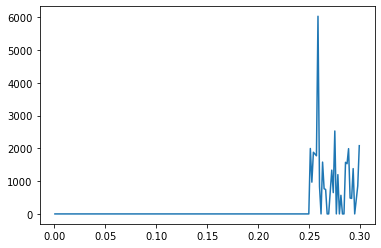

In [4]:
# and a test for 5d points
# takes several minutes to complete even for large discs 
dims5d = np.array([1.0,1.0,1.0,1.0,1.0])
points5d = pd.Bridson_sampling(dims5d, radius=0.25, k=30)
print_rdf(points5d, dims5d)